In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv("CO2 Emissions_Canada.csv")

NameError: name 'pd' is not defined

In [1]:

df

NameError: name 'df' is not defined

In [34]:
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [36]:
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [37]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]
categorical

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


# **Distributional Plots of the Numerical Data from the Dataset**

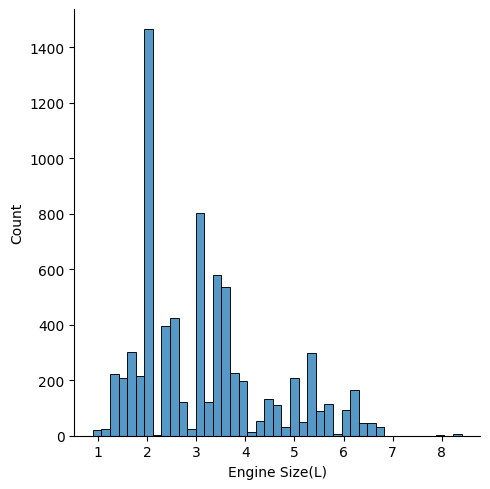

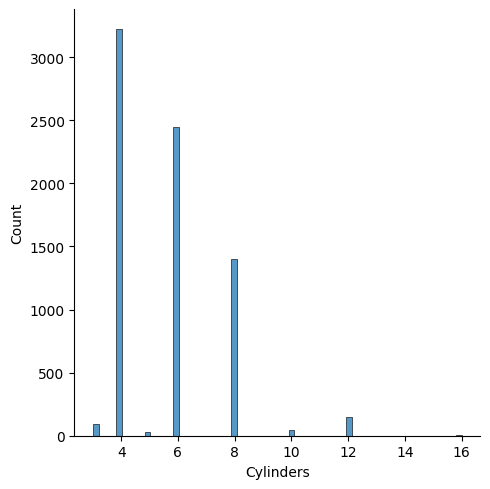

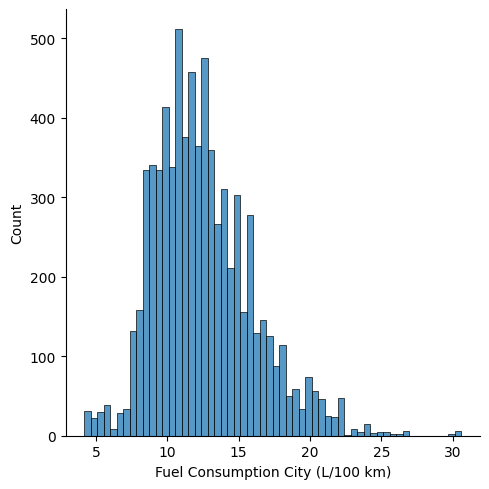

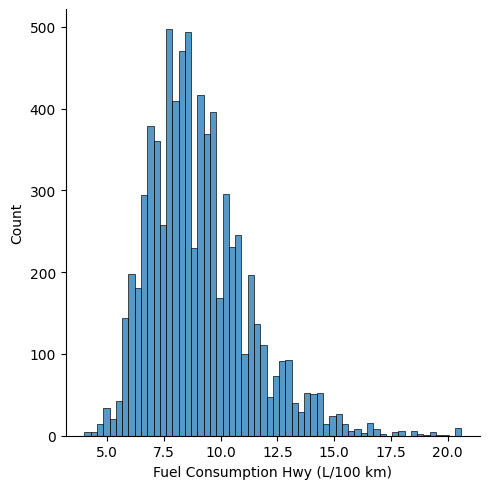

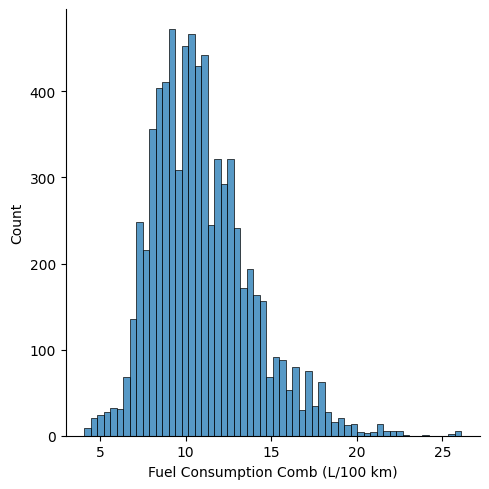

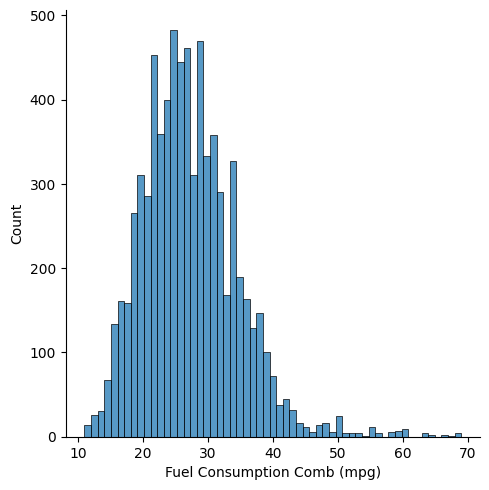

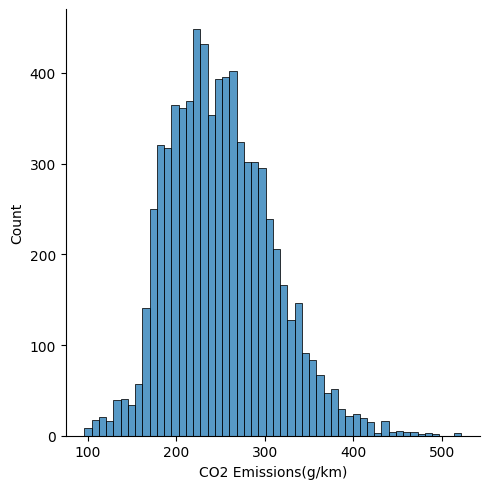

In [39]:
for col in numerical.columns:
  sns.displot(numerical[col])
  plt.show()

In [41]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)  7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 6   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 404.0 KB


# **Plot Relationships between Numerical Values**

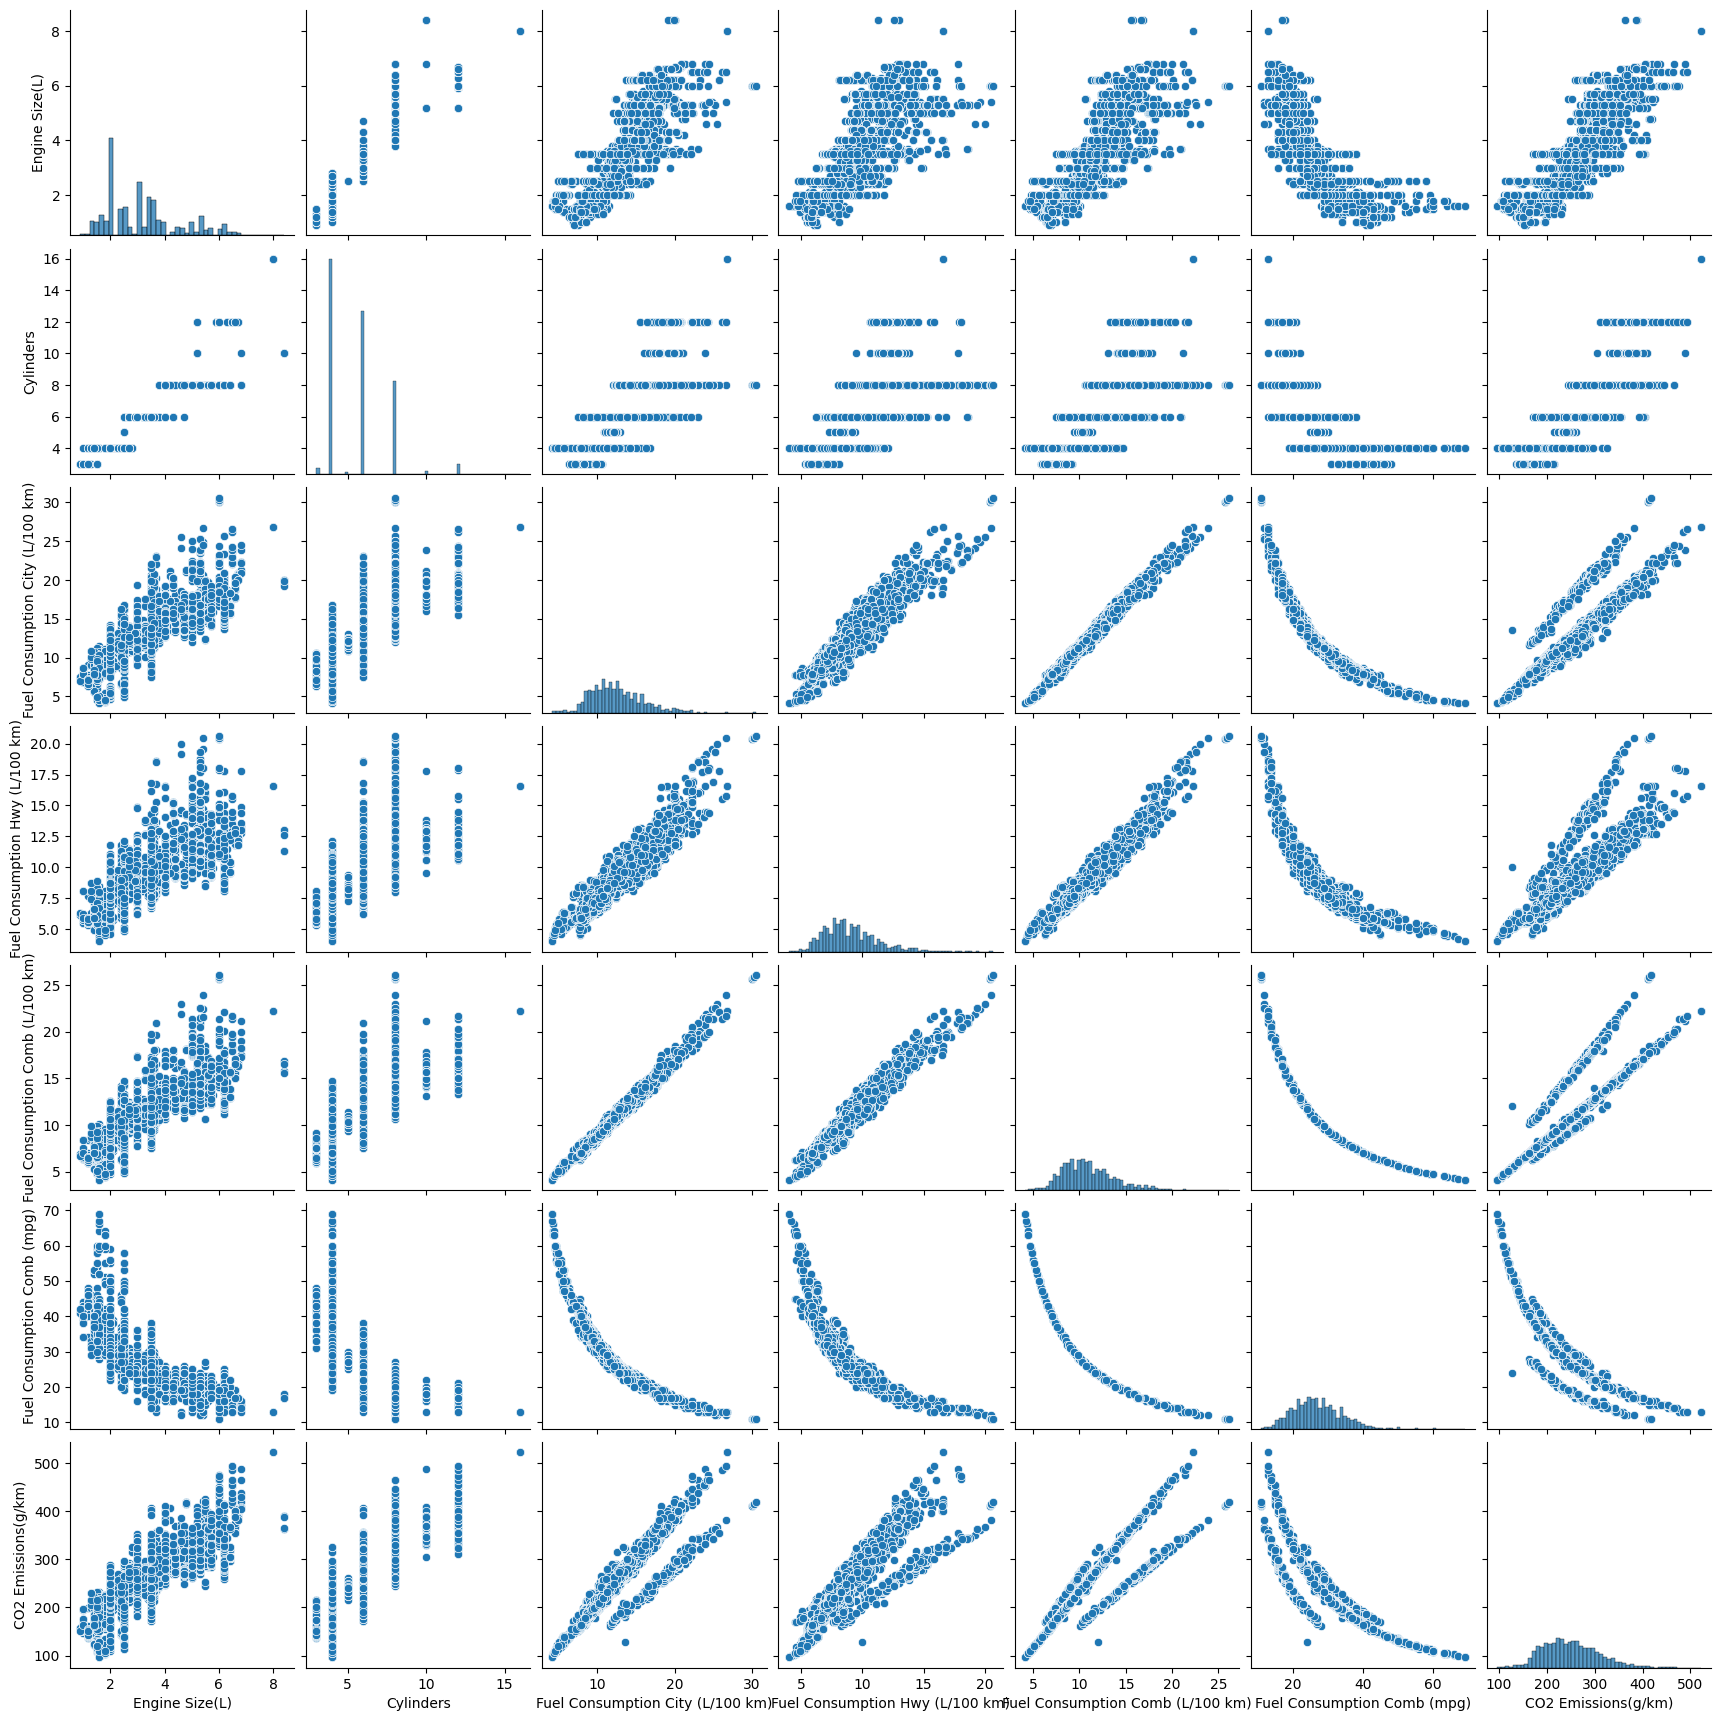

In [40]:
sns.pairplot(numerical)

In [42]:
numerical.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<Axes: >

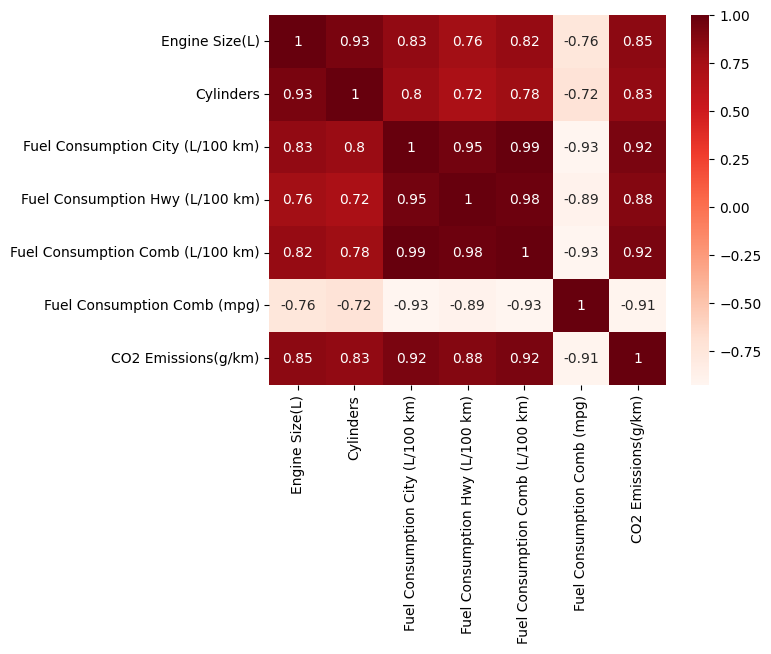

In [43]:
corr = numerical.corr()
sns.heatmap(corr,
          xticklabels=corr.columns,
          yticklabels=corr.columns,
          annot=True, cmap='Reds')

In [44]:
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


# **This is where I start to train my Model**

In [45]:
#The Quotations I am using are columns from the dataset
X = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'  ]]
Y = df['Cylinders']

In [46]:
#Training this dataset into a mini training/testing set
#Setting the test_size=0.3 gives me  a 30% test size and a 70% train size.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4347,3.6,13.8,10.4,12.2,23,287
1168,2.0,10.6,7.2,9.1,31,209
6042,2.4,11.3,9.5,10.5,27,247


In [47]:
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

In [48]:
print(X_train_scaled)
print("-------")
print(X_test_scaled)

[[ 0.31993974  0.35104437  0.60970374  0.42037367 -0.61887698  0.61251984]
 [-0.86011182 -0.56550992 -0.8334415  -0.6542611   0.49793737 -0.71711449]
 [-0.56509893 -0.36501367  0.20381914 -0.16894217 -0.0604698  -0.06934392]
 ...
 [-0.86011182 -0.6800792  -0.56285177 -0.61959546  0.49793737 -0.66597471]
 [-1.30263116 -0.85193313 -0.78834322 -0.82758929  0.77714096 -0.87053384]
 [-0.86011182 -0.9378601  -1.14912953 -1.03558312  1.05634454 -1.10918615]]
-------
[[-0.27008604 -0.50822527 -0.51775348 -0.51559855  0.35833558  0.06702883]
 [-0.86011182 -0.45094063 -0.33736033 -0.41160164  0.21873378 -0.37618261]
 [ 0.31993974  0.35104437  0.15872085  0.28171112 -0.47927518  0.4420539 ]
 ...
 [ 1.35248485  1.00981776  1.51166951  1.21768334 -1.17728415  1.49894272]
 [-0.56509893 -0.79464849 -1.05893295 -0.89692057  0.91674275 -0.98985999]
 [-0.86011182 -0.65143688 -0.56285177 -0.61959546  0.49793737 -0.63188152]]


# **Creating the Model**

In [49]:
#OLS Model
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(Y_train, X_train_const_scaled). fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled)

predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Cylinders   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     6240.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:55:07   Log-Likelihood:                -5027.8
No. Observations:                5169   AIC:                         1.007e+04
Df Residuals:                    5162   BIC:                         1.012e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6334      0.009    632.396      0.0

In [50]:
predictions_test

array([5.35196356, 4.21942408, 6.28396806, ..., 7.76304523, 4.65903047,
       4.1579054 ])

In [51]:
print(model.rsquared_adj)

0.8786912556529294


# **Model Fitting**

In [52]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# **Model Parameters**

In [53]:
model.coef_

array([ 0.9944871 ,  0.28298761, -0.12800171, -0.18539759,  0.04918768,
        0.00913614])

In [54]:
model.intercept_

-1.5217224697280738

In [55]:
model.score(X_test_scaled,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-14.852015047513458

In [56]:
Y_pred=model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
Y_test

3741    4
5298    4
4511    6
3949    6
3324    4
       ..
4809    4
3693    4
4758    8
1607    4
2805    4
Name: Cylinders, Length: 2216, dtype: int64

In [58]:
Y_pred

array([-1.75403886, -2.37788839, -1.19628619, ..., -0.35439299,
       -1.97070065, -2.35580422])

In [59]:
result=pd.DataFrame({"Y_test":Y_test, "Y_pred":Y_pred})

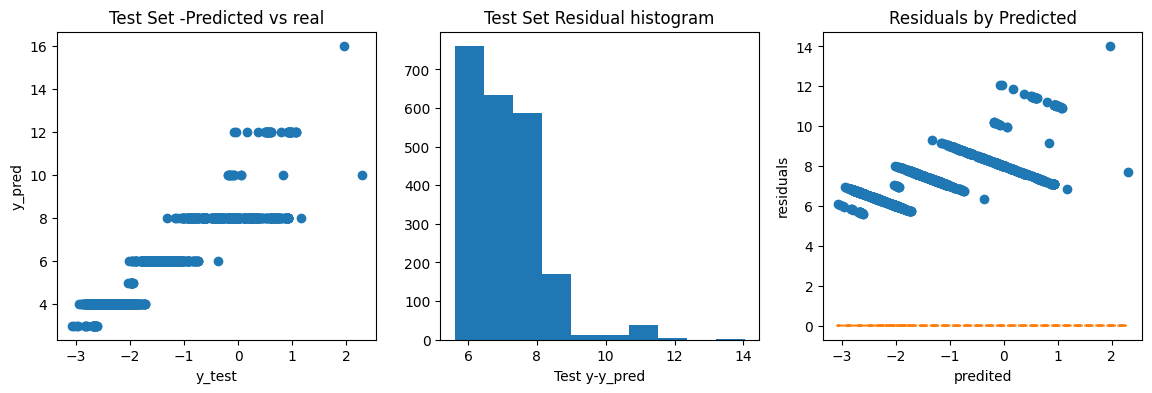

In [60]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(Y_pred, Y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(Y_test - Y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(Y_pred,Y_test - Y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(Y_pred,np.zeros(len(Y_pred)),linestyle='dashed')

<Axes: xlabel='Y_test', ylabel='Y_pred'>

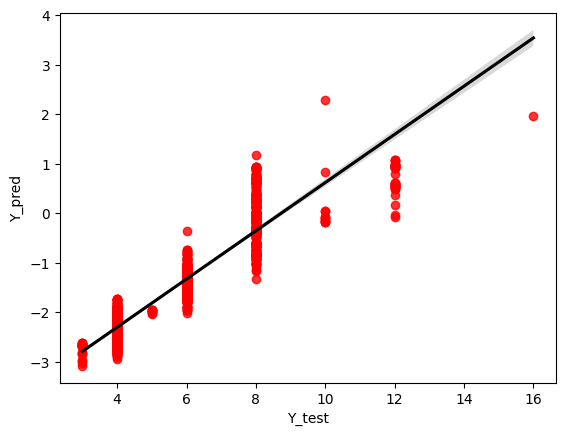

In [61]:
sns.regplot(x='Y_test', y='Y_pred', data=result, scatter_kws={"color":"red"}, line_kws={"color" : "black"})

In [62]:
mse = mse(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adj_r2= 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 51.522251164753634
R-squared: -14.852015047513458
Adjusted R-squared: -14.89507167507574


In [71]:
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


# **Fuel Consumption per City, Car Model**

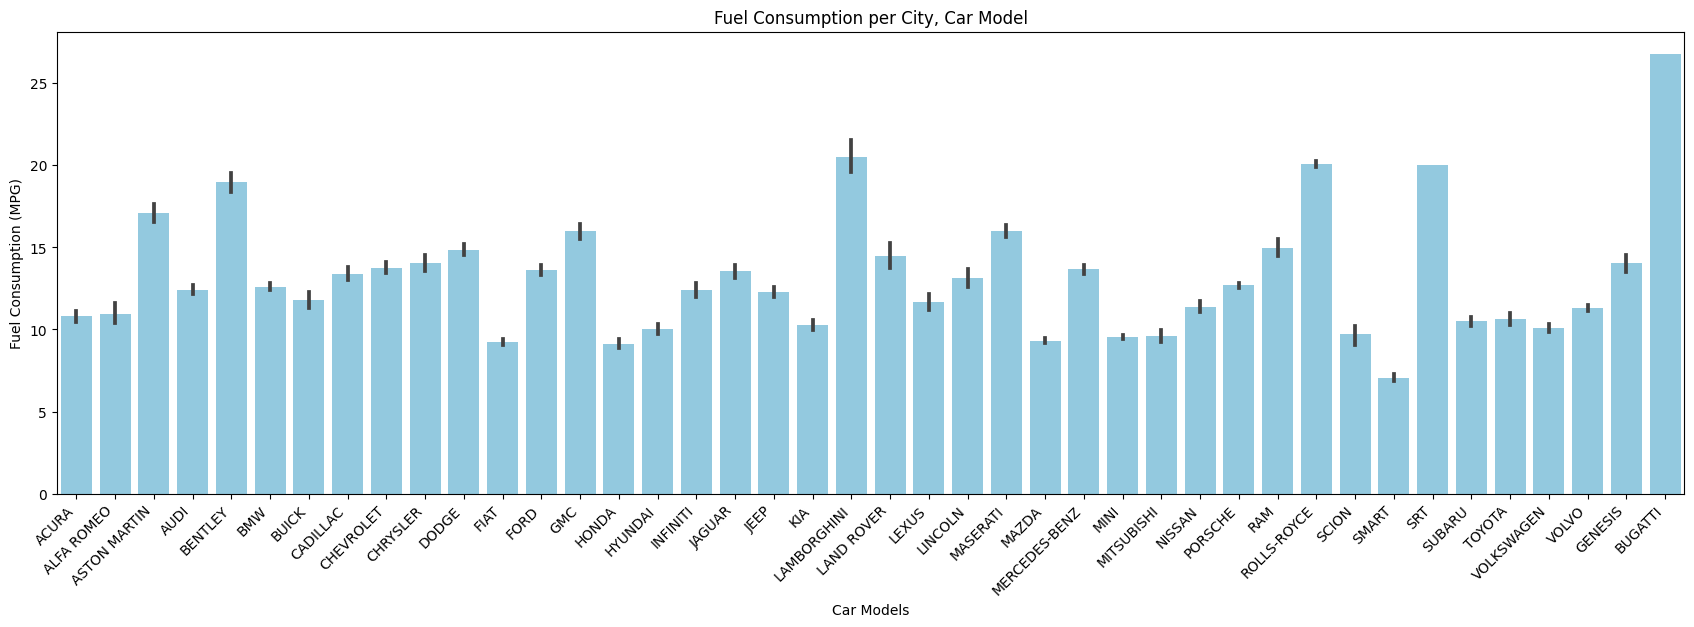

In [96]:
plt.figure(figsize=(21, 6))  # Set the size of the figure (optional)

sns.barplot(x = 'Make', y = 'Fuel Consumption City (L/100 km)', data=df, color='skyblue')

plt.xlabel('Car Models')
plt.ylabel('Fuel Consumption (MPG)')  # You can modify the label according to your data

plt.title('Fuel Consumption per City, Car Model')

plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels (optional)

plt.show()

# **Fuel Consumption per Highway, Car Model**

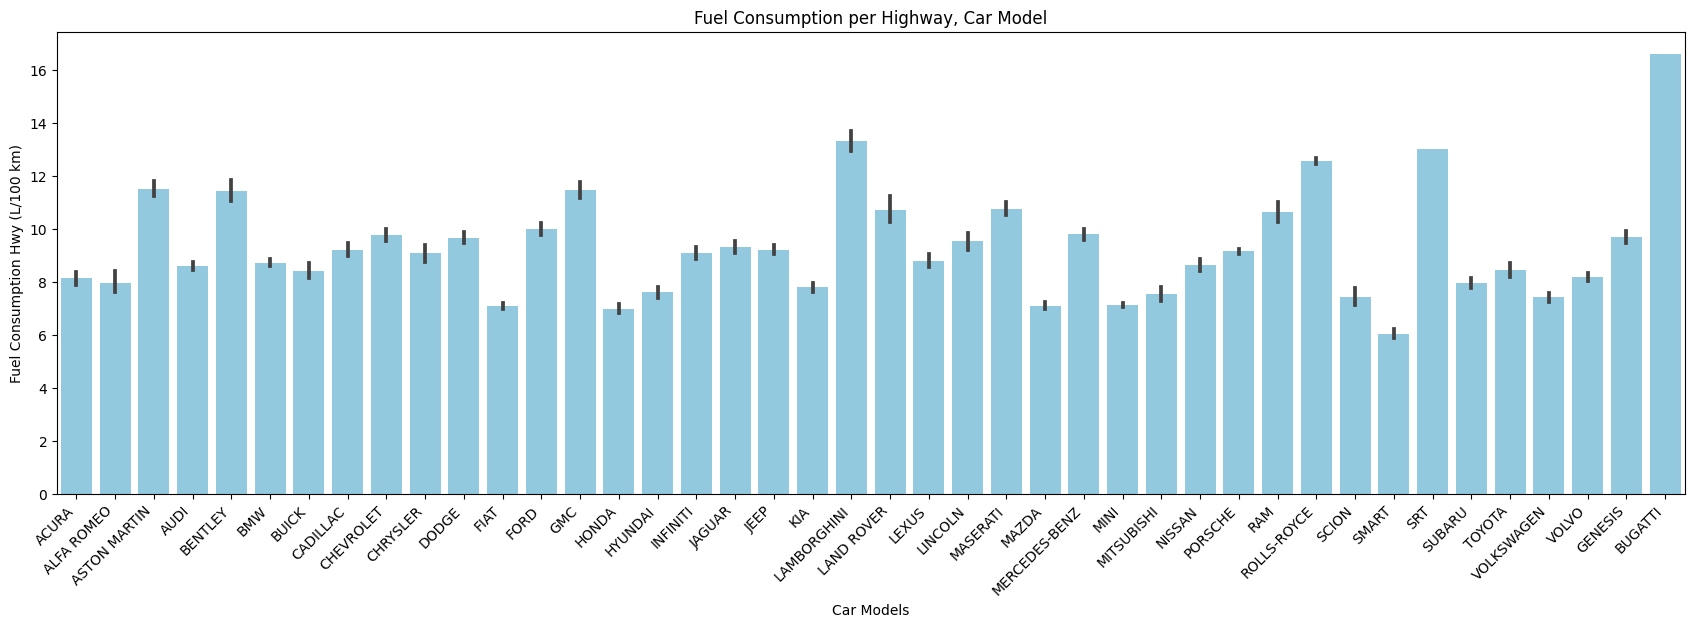

In [99]:
plt.figure(figsize=(21, 6))  # Set the size of the figure (optional)

sns.barplot(x = 'Make', y = 'Fuel Consumption Hwy (L/100 km)', data=df, color='skyblue')

plt.xlabel('Car Models')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')  # You can modify the label according to your data

plt.title('Fuel Consumption per Highway, Car Model')

plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels (optional)

plt.show()

# **CO2 Emissions(g/km) Per Car Model**

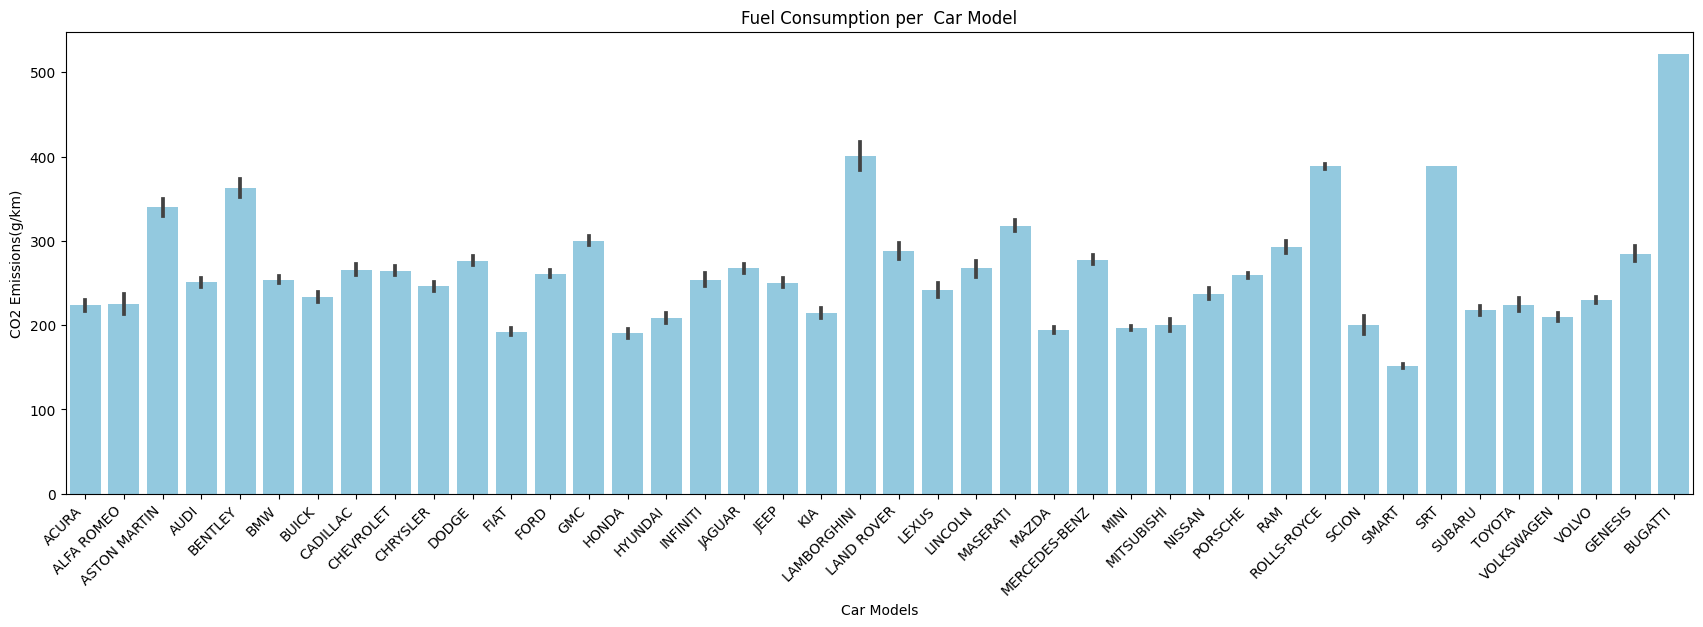

In [97]:
plt.figure(figsize=(21, 6))  # Set the size of the figure (optional)

sns.barplot(x = 'Make', y = 'CO2 Emissions(g/km)', data=df, color='skyblue')

plt.xlabel('Car Models')
plt.ylabel('CO2 Emissions(g/km)')  # You can modify the label according to your data

plt.title('Fuel Consumption per Car Model')

plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels (optional)

plt.show()

# **Conclusion**

**In conclusion, these Visuliaztion and graphs provide a comprehensive analysis of CO2 emissions in Canada, revealing a concerning trend of continuous increase over the examined period. The findings emphasize the significant influence of various factors, such as engine types, cylinder configurations, and fuel consumption patterns, on the escalating CO2 emissions. These revelations underscore the urgent need for targeted interventions and policy measures to curb the detrimental impact on the environment. The evidence presented herein unequivocally highlights the imperative for a paradigm shift towards sustainable practices and the adoption of eco-friendly technologies. To safeguard our planet's ecological balance and ensure a sustainable future, concerted efforts must be made by stakeholders, including government entities, industries, and individuals, to collaboratively mitigate CO2 emissions and pave the way for a cleaner and greener tomorrow. As this Model and Analysis reveals the potential repercussions of unabated CO2 emissions, it calls for a unified commitment to implement viable solutions, forging a path towards environmental stewardship and a more resilient planet for generations to come.**